In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
pd.options.mode.chained_assignment==None

False

# Preamble

In [3]:
gender_age = pd.read_csv(r"covid_deaths_gender_age.csv")
death_location = pd.read_csv(r"covid_deaths_location.csv")
death_type = pd.read_csv(r"covid_deaths_type.csv")

In [4]:
gender_age.head(2)

Week  Gender  Under 1 year  01-14  15-44  45-64  65-74  75-84  85+
0  30-Dec-19  Female             0      0      0      0      0      0    0
1  06-Jan-20  Female             0      0      0      0      0      0    0

In [5]:
death_location.head(2)

Week  Care Home  Home / Non-institution  Hospital  Other institution
0  30-Dec-19          0                       0         0                  0
1  06-Jan-20          0                       0         0                  0

In [6]:
death_type.head(2)

Week  covid      all  average
0  30-Dec-19      0   1,161    1,276 
1  06-Jan-20      0   1,567    1,560

### Data Cleaning

* The feature named `Week` has an incorrect data type. So, it is changed to a date-time object in all 3 datasets.
* In the `death_type` dataset, the `all` and `average` columns have an incorrect data type because of the formatting of numeric values. So, the comma is removed and an appropriate type-casting is done.

In [7]:
gender_age.Week = pd.to_datetime(gender_age.Week)
death_location.Week = pd.to_datetime(death_location.Week)
death_type.Week = pd.to_datetime(death_type.Week)

# sort data by date in ascending order. THIS IS A VERY IMPORTANT OPERATION!!!! Other actions taken further down are highly dependent on this.
gender_age = gender_age.sort_values(by='Week').reset_index(drop=True)
death_location = death_location.sort_values(by='Week').reset_index(drop=True)
death_type = death_type.sort_values(by='Week').reset_index(drop=True)

In [8]:
# remove commas within numbers
death_type['all'] = death_type['all'].map(lambda x: int(x.replace(',', '')))
death_type['average'] = death_type['average'].map(lambda x: int(x.replace(',', '')))

In [9]:
gender_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Week          60 non-null     datetime64[ns]
 1   Gender        60 non-null     object        
 2   Under 1 year  60 non-null     int64         
 3   01-14         60 non-null     int64         
 4   15-44         60 non-null     int64         
 5   45-64         60 non-null     int64         
 6   65-74         60 non-null     int64         
 7   75-84         60 non-null     int64         
 8   85+           60 non-null     int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 4.3+ KB


In [10]:
death_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Week                    30 non-null     datetime64[ns]
 1   Care Home               30 non-null     int64         
 2   Home / Non-institution  30 non-null     int64         
 3   Hospital                30 non-null     int64         
 4   Other institution       30 non-null     int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 1.3 KB


In [11]:
death_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Week     30 non-null     datetime64[ns]
 1   covid    30 non-null     int64         
 2   all      30 non-null     int64         
 3   average  30 non-null     int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 1.1 KB


In [12]:
# first and last date of records
print(gender_age.Week.iloc[0])
print(gender_age.Week.iloc[-1])
print()
print(death_location.Week.iloc[0])
print(death_location.Week.iloc[-1])
print()
print(death_type.Week.iloc[0])
print(death_type.Week.iloc[-1])

2019-12-30 00:00:00
2020-07-20 00:00:00

2019-12-30 00:00:00
2020-07-20 00:00:00

2019-12-30 00:00:00
2020-07-20 00:00:00


## Data description

* The 3 datasets are **tabular** and they contain demographic information about Covid-19 cases. We have records on: 
    * the mortality recorded for each age group per week.  
    * mortality recorded per week in 4 kinds of institutions.
    * weekly mortality with their averages. 
    
    
* They are clean, small in size (max of 60 records and 9 features), easy-to-understand records.
* The data types present are: categorical (male or female), numeric and date-times.
* They have a foreign key (the feature named 'week'), though with a disproportionate amount of fields.
* They contain records taken within December 30, 2019 and July 20, 2020 (~ 8 months).

* According to the data owner, the regional director of the health board is interested in seeing weekly overview/summary of the Covid19 information. These datasets describe the number of deaths resulting from covid categorised by gender,age group and death location.

# Data Exploration

### Descriptive statistics

**Insights**

* Unlike the adults (especially the aged ones), children and adolescents have a neglible record of covid death during the period of time the data was gathered.
* The data isn't a gender-biased one. There are equal number of male and female records.
* Large scale medical institutions (like hospitals) records the highest occurence of patient's death.
* Mortality recorded daily is high.
* Data related to cases of death was recorded once per day while others were taken twice per day on a weekly basis (7 days interval).

In [13]:
gender_age.select_dtypes(include = [np.number]).describe().T

count       mean        std  min  25%  50%    75%    max
Under 1 year   60.0   0.000000   0.000000  0.0  0.0  0.0   0.00    0.0
01-14          60.0   0.000000   0.000000  0.0  0.0  0.0   0.00    0.0
15-44          60.0   0.466667   0.891897  0.0  0.0  0.0   1.00    4.0
45-64          60.0   5.766667   9.939421  0.0  0.0  0.0   7.50   47.0
65-74          60.0  10.000000  16.856322  0.0  0.0  0.5  10.75   68.0
75-84          60.0  23.433333  36.998107  0.0  0.0  3.0  32.75  131.0
85+            60.0  30.350000  48.991118  0.0  0.0  3.0  37.00  178.0

In [14]:
gender_age.select_dtypes(include = [np.object]).describe().T

<ipython-input-14-58786c217d18>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  gender_age.select_dtypes(include = [np.object]).describe().T


count unique     top freq
Gender    60      2  Female   30

In [15]:
len(gender_age[gender_age.Gender == 'Male']) == len(gender_age[gender_age.Gender == 'Female']) == len(gender_age)/2 # equal records of male and female

True

In [16]:
death_location.select_dtypes(include = [np.number]).describe().T

count       mean         std  min  25%   50%    75%  \
Care Home                30.0  65.066667  107.409283  0.0  0.0   5.0  64.00   
Home / Non-institution   30.0   9.766667   15.921539  0.0  0.0   1.5  12.75   
Hospital                 30.0  64.966667  102.840849  0.0  0.0  10.0  85.00   
Other institution        30.0   0.233333    0.568321  0.0  0.0   0.0   0.00   

                          max  
Care Home               341.0  
Home / Non-institution   63.0  
Hospital                357.0  
Other institution         2.0

In [17]:
death_type.select_dtypes(include = [np.number]).describe().T

count         mean         std    min     25%     50%      75%  \
covid     30.0   140.033333  217.772656    0.0     0.0    15.5   205.25   
all       30.0  1278.800000  289.013590  953.0  1082.5  1192.0  1396.25   
average   30.0  1136.133333  136.320296  977.0  1028.0  1092.5  1242.50   

            max  
covid     661.0  
all      1978.0  
average  1560.0

In [18]:
print(list(Counter(gender_age.Week.values).values())) # daily observations count for non-death data
print(list(Counter(death_location.Week.values).values())) # daily observations count for deaths data
print(list(Counter(death_type.Week.values).values())) # daily observations count for deaths data

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [19]:
days = gender_age.Week.drop_duplicates().reset_index(drop=True)

print((days.iloc[-1]-days.iloc[0])/((len(days))-1)) # common difference formula of an arithmetic progression --> d = [(last term) - first term] / (n-1)
print()
print((days.equals(death_location.Week.drop_duplicates())), 
      (days.equals(death_type.Week.drop_duplicates())), 
      death_location.Week.drop_duplicates().equals(death_type.Week.drop_duplicates())) # checks if the days of observations are exactly the same across the 3 datasets

7 days 00:00:00

True True True


In [20]:
# merge two similar data LIKELY recorded on same day
death_location_and_type = pd.merge(death_location, death_type).rename(columns={'covid':'Death_by_covid', 'all':'Total_death', 'average':'Average_death'})
death_location_and_type['Non_covid_death'] = death_location_and_type['Total_death']-death_location_and_type['Death_by_covid'] # create a new column populated with death not caused by covid

# create a new column populated by mapping four weeks to 1 month
month = [i+1 for i in range(round(len(death_location_and_type)/4)) for j in range(4)][:len(death_location_and_type)]
death_location_and_type['Month'] = month


death_location_and_type = death_location_and_type[['Week', 'Month', 'Care Home', 'Home / Non-institution', 'Hospital', 
                                                   'Other institution', 'Death_by_covid', 'Non_covid_death', 'Total_death', 'Average_death']]

death_location_and_type.head(2)

Week  Month  Care Home  Home / Non-institution  Hospital  \
0 2019-12-30      1          0                       0         0   
1 2020-01-06      1          0                       0         0   

   Other institution  Death_by_covid  Non_covid_death  Total_death  \
0                  0               0             1161         1161   
1                  0               0             1567         1567   

   Average_death  
0           1276  
1           1560

### Inferential statistics

**Insights**

* Data for the month is a normal distribution, data for the institution is right-skewed. Data for non-covid death is nearly a normal distribution. Others are right-skewed.

In [21]:
plt.rcParams['figure.constrained_layout.use'] = True
plt.rcParams['figure.figsize'] = (10, 8)
sns.set_theme(style='whitegrid')

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


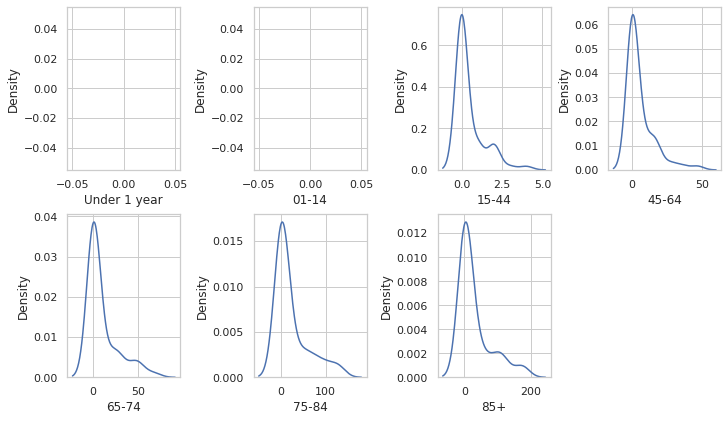

In [22]:
for i, column in enumerate(gender_age.columns[2:], 1):
    if column not in ['Gender']:
        plt.subplot(3, 4, i)
        ax = sns.kdeplot(gender_age[column])

plt.show()

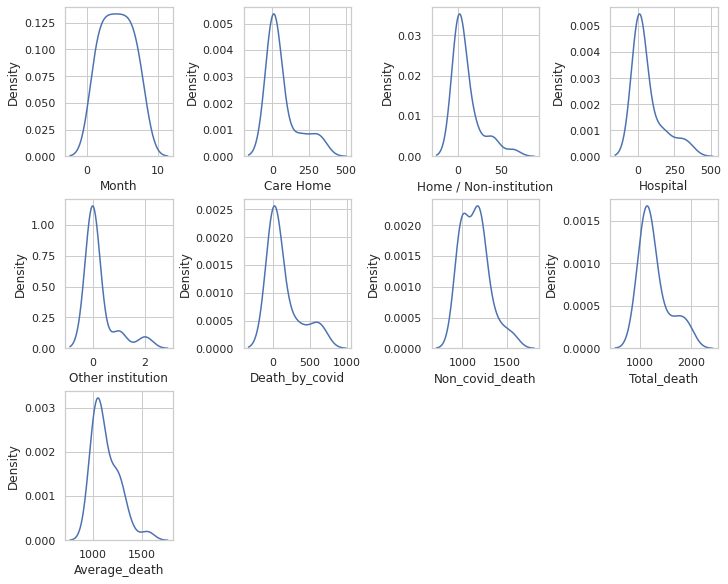

In [23]:
for i, column in enumerate(death_location_and_type.columns[1:], 1):
    plt.subplot(3, 4, i)
    ax = sns.kdeplot(death_location_and_type[column])

plt.show()

In [24]:
gender_grouped_age = gender_age.copy()

# create condensed groups for age groups
gender_grouped_age['Children/Teen'] = gender_grouped_age['Under 1 year']+gender_grouped_age['01-14']
gender_grouped_age['Youth'] = gender_grouped_age['15-44']
gender_grouped_age['Adult'] = gender_grouped_age['45-64']+gender_grouped_age['65-74']
gender_grouped_age['Aged'] = gender_grouped_age['75-84']+gender_grouped_age['85+']

gender_grouped_age = gender_grouped_age[['Week', 'Gender', 'Children/Teen', 'Youth', 'Adult', 'Aged']]
gender_grouped_age.tail()

Week  Gender  Children/Teen  Youth  Adult  Aged
55 2020-07-06  Female              0      0      2     6
56 2020-07-13    Male              0      0      0     2
57 2020-07-13  Female              0      0      0     4
58 2020-07-20  Female              0      0      1     4
59 2020-07-20    Male              0      0      0     3

### Visualizations

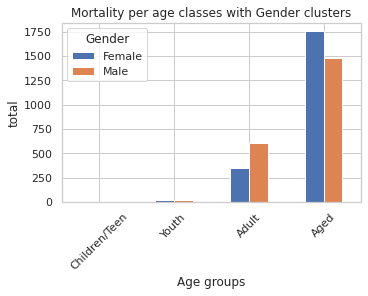

In [25]:
gender_grouped_age_slice = gender_grouped_age.groupby(['Gender']).sum().T

# total male vs female patients per age group
gender_grouped_age_slice.plot(kind='bar', figsize=(5,4))
plt.title('Mortality per age classes with Gender clusters')
plt.xticks(rotation=45)
plt.ylabel('total')
plt.xlabel('Age groups')
plt.show()

From the barchart above, aged females were more hospitalized than male

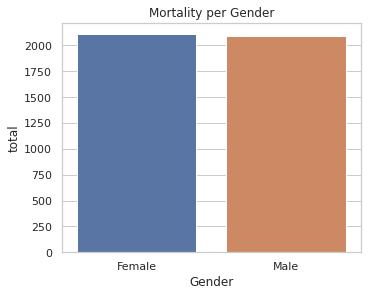

In [26]:
temp1 = pd.DataFrame(gender_grouped_age_slice.sum(axis=0)).rename(columns={0:'total'})

# male vs female patients count
fig, ax = plt.subplots(figsize=(5,4))
ax.set_title('Mortality per Gender')
sns.barplot(x=temp1.index, y='total', data=temp1)
plt.show()

#### Distribution of covid death by age group
The aged people have higher death rates compared to children and youth

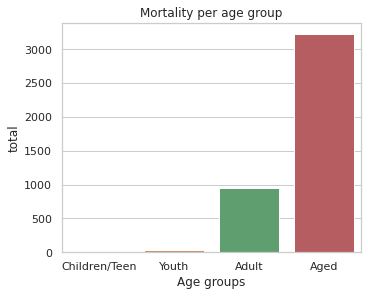

In [27]:
temp2 = pd.DataFrame(gender_grouped_age_slice.sum(axis=1)).rename(columns={0:'total'})

# age groups total mortality
fig, ax = plt.subplots(figsize=(5,4))
ax.set_title('Mortality per age group')
ax.set_xlabel('Age groups')
sns.barplot(x=temp2.index, y='total', data=temp2)
plt.show()

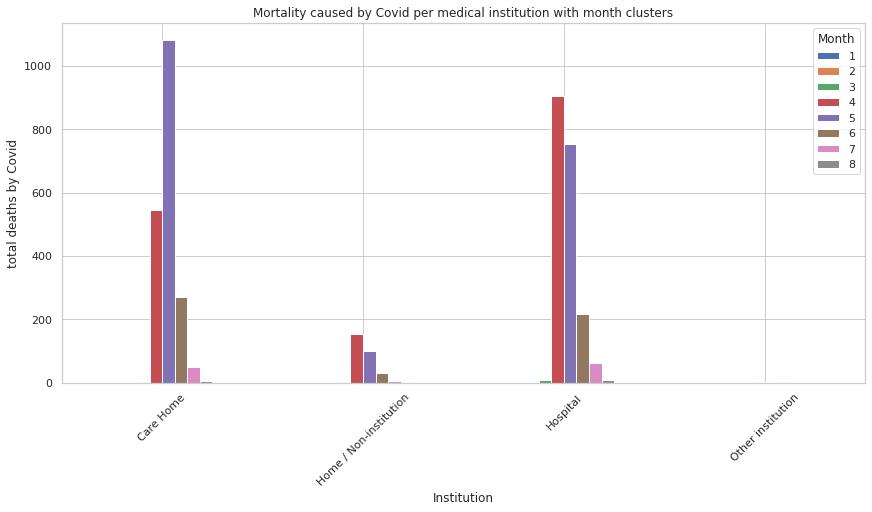

In [30]:
grouped_death_location_and_type = death_location_and_type[death_location_and_type.columns[1:6]].groupby(['Month']).sum().T

# total monthly covid deaths per institution
grouped_death_location_and_type.plot(kind='bar', figsize=(12,7))
plt.title('Mortality caused by Covid per medical institution with month clusters')
plt.xticks(rotation=45)
plt.ylabel('total deaths by Covid')
plt.xlabel('Institution')
plt.show()

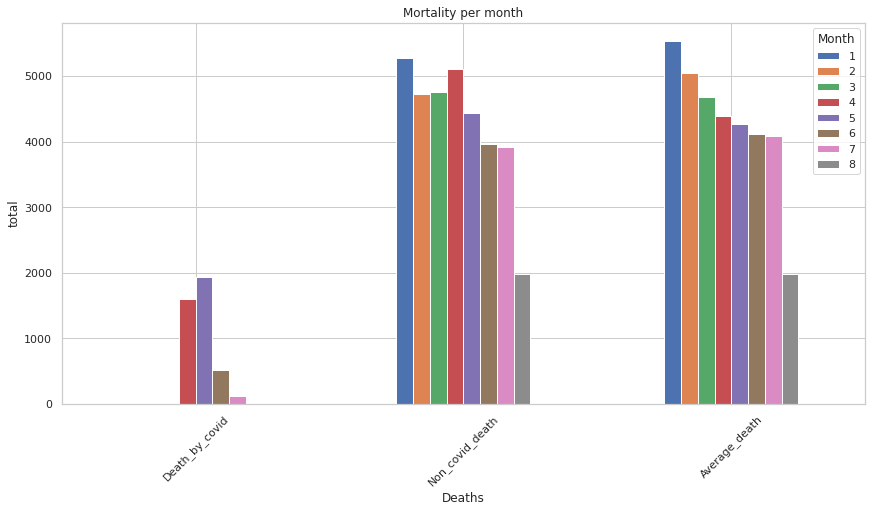

In [29]:
grouped_death_location_and_type_2 = death_location_and_type.drop('Total_death', axis=1)
sel = ['Month']+list(grouped_death_location_and_type_2.columns[6:])
grouped_death_location_and_type_2 = grouped_death_location_and_type_2[sel].groupby(['Month']).sum().T

# total monthly mortality
grouped_death_location_and_type_2.plot(kind='bar', figsize=(12,7))
plt.title('Mortality per month')
plt.xticks(rotation=45)
plt.ylabel('total')
plt.xlabel('Deaths')
plt.show()

#month 1 represent data in December 2019 and January 2020, month 2-8 represent February to July 2020

In [30]:
grouped_death_location_and_type_2.head()

Month               1     2     3     4     5     6     7     8
Death_by_covid      0     0    11  1603  1939   519   115    14
Non_covid_death  5276  4728  4762  5114  4432  3962  3917  1972
Average_death    5535  5040  4683  4383  4264  4118  4088  1973

## Reflection and Hypothesis:
1. According to the data, covid death rate increases with increasing age. Children and teens have zero record of covid19 death. We can infer that children are less susceptible to infections and have stronger immune system than older people. We can test this hypothesis by carrying out further research on children's immune system. We could ask the data owner for data on children immunization. Further research can be done to clarify the effect of age on covid.
2. There are 8 times non-covid death than covid death, we may infer that some underlying or existing diseases/sicknesses can aggravate covid infection resulting in more death. This can further be tested by exploring more data on patients with existing medical conditions who died of covid.
3. The data is captured over an eight-month period from December 2019 to July 2020 which denotes the first wave of covid19 in the UK. The first series of death were recorded in March 2020 which is the month the country went on lockdown. It can be inferred that the first series of death prompted the government to enforce more safety rules and regulations.
4. As seen on the 'mortality per institution' graph, the care home which is believed to house older people unusually experienced more covid death in the months April and May. It can be inferred that the lockdown possibly inhibited access to hospital care during this period. We can do further research on the implications of covid19 lockdown on access to healthcare services.